# image Processing HW1(Poorya MohammadiNasab_400722138)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

Q2 - Part 1

In [2]:
def calc_hist(image):
    '''
  calculate image histogram
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    hist (ndarray): computed input image histogram
  '''
    hist = np.zeros(256,dtype=int)
    ############
    # Your code
    # Start
    
    for ix,iy in np.ndindex(image.shape):
        hist[image[ix,iy]] = hist[image[ix,iy]] + 1

    # End
    return hist

**compute histogram with opencv**

In [4]:
############
# Your code
# Start
cv_hist = cv2.calcHist([img],[0],None,[256],[0,256])
# End

In [5]:
sum(cv_hist)

array([137216.], dtype=float32)

test **(don't change next cell)**

Text(0.5, 1.0, 'Opencv histogram')

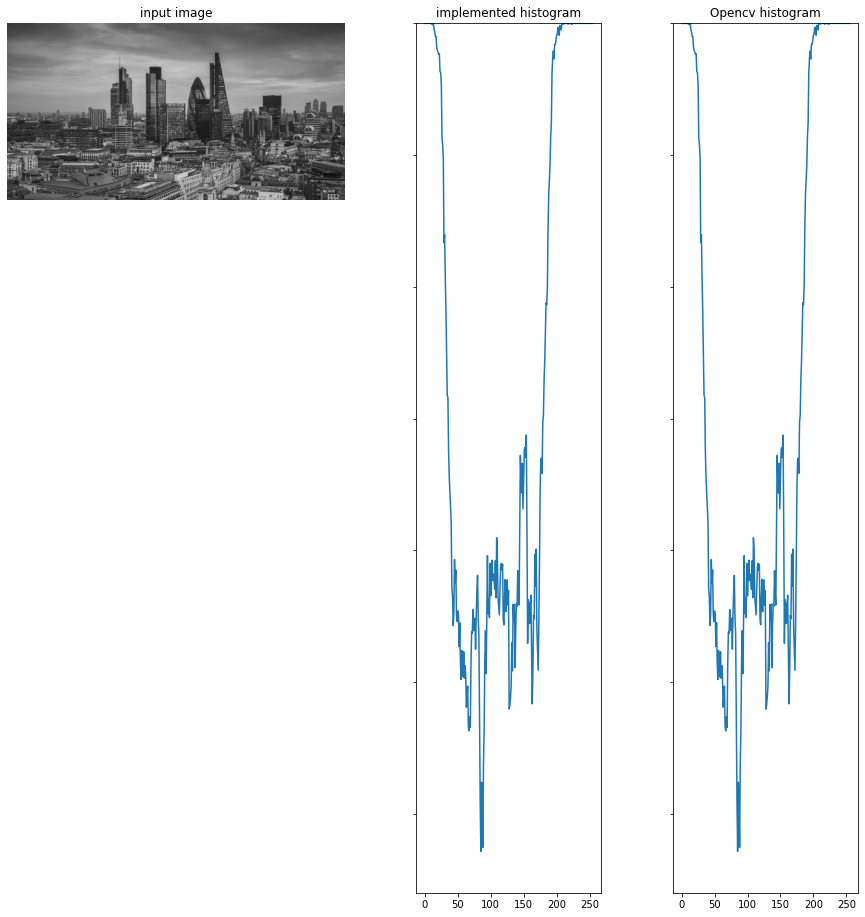

In [6]:
img = cv2.imread('img1.jpg',cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, 3), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('input image')
grid[0].axis('off')
grid[1].plot(calc_hist(img))
grid[1].set_title('implemented histogram')
grid[2].plot(cv_hist)
grid[2].set_title('Opencv histogram')





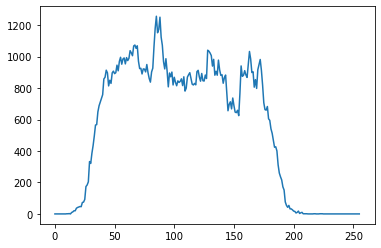

In [7]:
plt.plot(calc_hist(img))

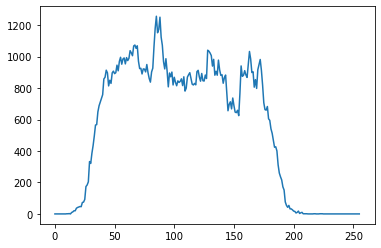

In [8]:
plt.plot(cv_hist)

Q2 - Part 2

In [9]:
def stretch_hist(image):
    '''
    don't use libraries
    input(s):
    image (ndarray): input image
    output(s):
    output_image (ndarray): enhanced image with histogram stretching
    '''
    output_image = image.copy()
    ############
    # Your code
    # Start
    min_pix = np.min(image)
    max_pix = np.max(image)
    max_min_different = max_pix - min_pix
    
    for ix,iy in np.ndindex(image.shape):
        output_image[ix,iy] = ((output_image[ix,iy] - min_pix)/(max_min_different))* 255
        
    # End
    return output_image


test **(don't change next cell)**

Text(0.5, 1.0, 'enhanced histogram')

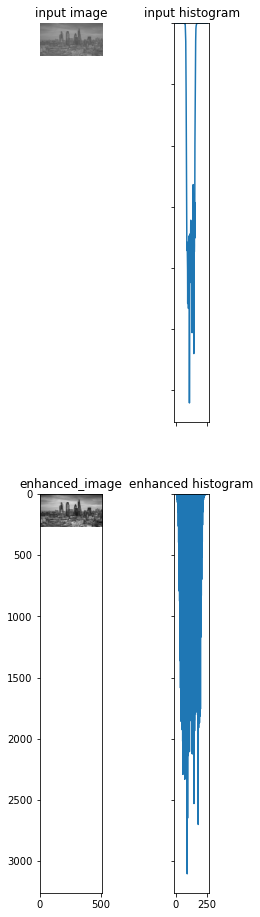

In [10]:
img = cv2.imread('img2.jpg',cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('input image')
grid[0].axis('off')
grid[1].plot(calc_hist(img))
grid[1].set_title('input histogram')
enhanced_image = stretch_hist(img)
grid[2].imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
grid[2].set_title('enhanced_image')
grid[3].plot(calc_hist(enhanced_image))
grid[3].set_title('enhanced histogram')

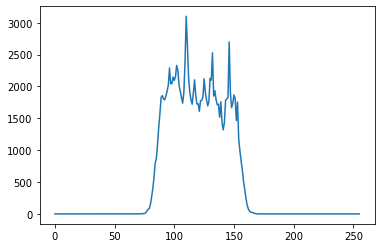

In [11]:
plt.plot(calc_hist(img))

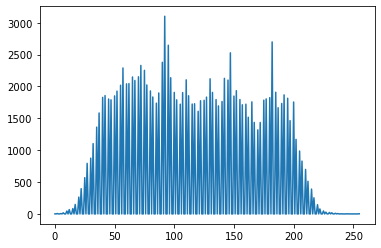

In [12]:
plt.plot(calc_hist(enhanced_image))

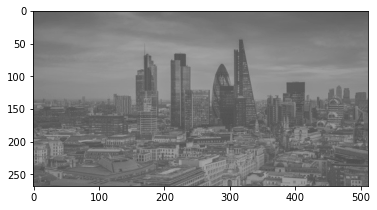

In [13]:
plt.imshow(img,cmap='gray',vmin=0,vmax=255)

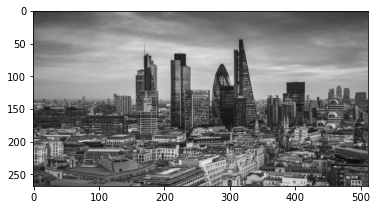

In [14]:
plt.imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)

Q2-Part3

In [15]:
def modified_stretch_hist(image):
    '''
    don't use libraries
    input(s):
    image (ndarray): input image
    output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
    '''
    output_image = image.copy()
    ############
    # Your code
    # Start
    
    # 1% of picture values from bottom & top
    One_percent_of_picture_values = int(0.01 * (image.shape[0] * image.shape[1]))
    img_hist = calc_hist(image)
    
    # Bottom -> Top
    sum_tmp = 0
    min_idx = 0
    for i in range(0,256):
        sum_tmp = sum_tmp + img_hist[i]
        
        if(sum_tmp >= One_percent_of_picture_values):
            min_idx = i
            break
            
    # Top -> Bottom   
    sum_tmp = 0
    max_idx = 255
    for i in range(255,-1,-1):
        sum_tmp = sum_tmp + img_hist[i]
        
        if(sum_tmp >= One_percent_of_picture_values):
            max_idx = i
            break
    
    max_min_different = max_idx - min_idx
    
    for ix,iy in np.ndindex(image.shape):
        output_image[ix,iy] = ((output_image[ix,iy] - min_idx)/(max_min_different))* 255
    
    # End
    ############
    return output_image


In [16]:
print(sum(calc_hist(img)[141:]))

28279


In [17]:
x = calc_hist(img)
x[128]

1695

test **(don't change next cell)**

Text(0.5, 1.0, 'enhanced histogram')

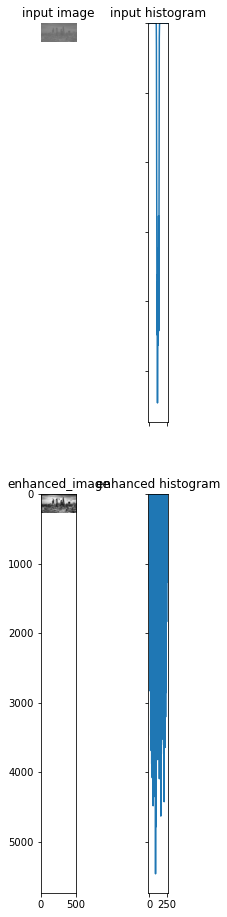

In [18]:
img = cv2.imread('img4.jpg',cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('input image')
grid[0].axis('off')
grid[1].plot(calc_hist(img))
grid[1].set_title('input histogram')
enhanced_image = modified_stretch_hist(img)
grid[2].imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
grid[2].set_title('enhanced_image')
grid[3].plot(calc_hist(enhanced_image))
grid[3].set_title('enhanced histogram')

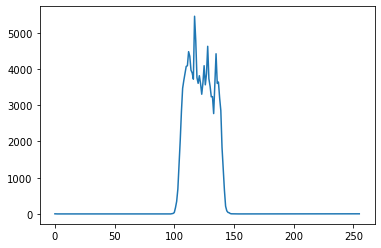

In [19]:
plt.plot(calc_hist(img))

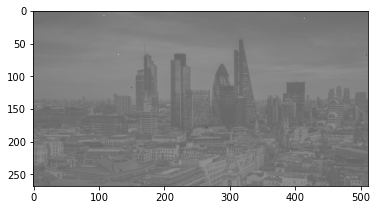

In [20]:
plt.imshow(img,cmap='gray',vmin=0,vmax=255)

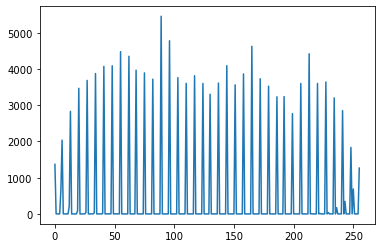

In [21]:
plt.plot(calc_hist(enhanced_image))

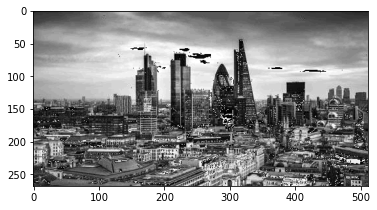

In [22]:
plt.imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)

Q2-Part 4

In [139]:
def equalize_hist(image):
    '''
    don't use libraries
    input(s):
    image (ndarray): input image
    output(s):
    output_image (ndarray): enhanced image with histogram equalization
    '''
    output_image = image.copy()
    ############
    # Your code
    # Start
    
    
    img_hist = calc_hist(image)
    num_of_pixel = image.shape[0] * image.shape[1]
    
    # p
    pixel_PDF = img_hist / num_of_pixel
    
    # P
    pixel_CDF = []
    for i in range(len(pixel_PDF)):
        pixel_CDF.append(sum(pixel_PDF[0:i]))
        
    Hist_equalizer_arr = pixel_CDF   
    
    for ix,iy in np.ndindex(image.shape):
        output_image[ix,iy] = image[ix,iy] * Hist_equalizer_arr[image[ix,iy]]
    

    # End
    return output_image


In [140]:
equalize_hist(img)

array([[14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       ...,
       [ 0,  8, 21, ..., 25, 21, 25],
       [ 8, 11, 14, ..., 21, 25, 25],
       [29, 25, 21, ..., 14, 18, 18]], dtype=uint8)

test **(don't change next cell)**

Text(0.5, 1.0, 'histogram')

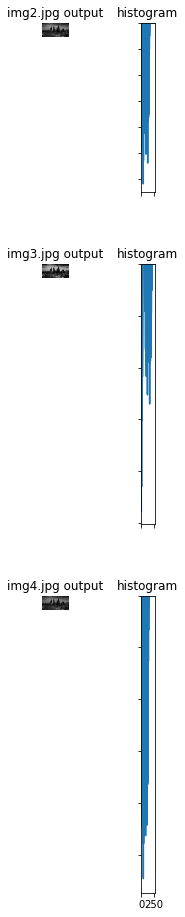

In [141]:
img1 = cv2.imread('img2.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img3.jpg',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('img4.jpg',cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(3, 2), 
                 axes_pad=1,  
                 )


eq_img1 = equalize_hist(img1)
grid[0].imshow(eq_img1,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('img2.jpg output')
grid[0].axis('off')
grid[1].plot(calc_hist(eq_img1))
grid[1].set_title('histogram')
eq_img2 = equalize_hist(img2)
grid[2].imshow(eq_img2,cmap='gray',vmin=0,vmax=255)
grid[2].set_title('img3.jpg output')
grid[2].axis('off')
grid[3].plot(calc_hist(eq_img2))
grid[3].set_title('histogram')
eq_img3 = equalize_hist(img3)
grid[4].imshow(eq_img3,cmap='gray',vmin=0,vmax=255)
grid[4].set_title('img4.jpg output')
grid[4].axis('off')
grid[5].plot(calc_hist(eq_img3))
grid[5].set_title('histogram')

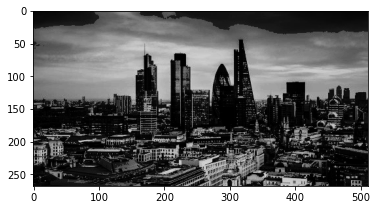

In [142]:
plt.imshow(eq_img2,cmap='gray',vmin=0,vmax=255)

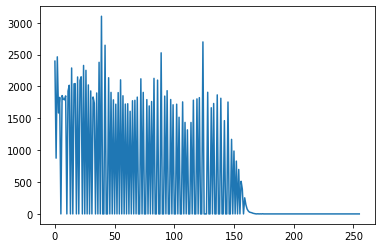

In [143]:
plt.plot(calc_hist(eq_img1))

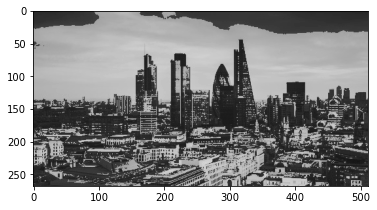

In [144]:
plt.imshow(img2,cmap='gray',vmin=0,vmax=255)

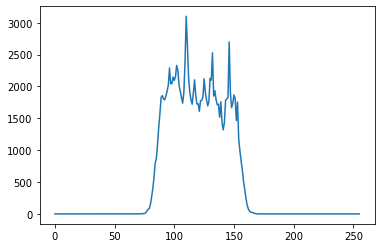

In [145]:
plt.plot(calc_hist(img1))

Q3

In [128]:
# this fuction added to help for histogram matching
def image_equalizer_array(image):
    '''
    don't use libraries
    input(s):
    image (ndarray): input image
    output(s):
    output_image (ndarray): enhanced image with histogram equalization
    '''
    output_image = image.copy()
    ############
    # Your code
    # Start
    img_hist = calc_hist(image)
    num_of_pixel = image.shape[0] * image.shape[1]
    
    pixel_PDF = img_hist / num_of_pixel
    
    pixel_CDF = []
    for i in range(len(pixel_PDF)):
        pixel_CDF.append(sum(pixel_PDF[0:i]))  

    # End
    return np.int64(np.dot(1000,pixel_CDF))

In [129]:
image_equalizer_array(img2)

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    1,    2,    5,    8,   12,   18,   24,   33,
         43,   54,   68,   81,   94,  107,  121,  135,  149,  166,  181,
        196,  211,  227,  243,  259,  276,  290,  304,  318,  331,  345,
        362,  384,  403,  419,  432,  445,  455,  464,  470,  473,  475,
        476,  476,  476,  476,  476,  476,  476,  476,  476,  476,  476,
        476,  476,  476,  476,  476,  476,  476,  476,  476,  476,  476,
        476,  476,  476,  476,  476,  476,  476,  476,  476,  476,  476,
        476,  476,  476,  476,  476,  476,  476,  476,  476,  476,  476,
        476,  476,  476,  476,  476,  476,  476,  476,  476,  476,  476,
        476,  476,  476,  476,  476,  476,  476,  476,  476,  476,  476,
        476,  476,  476,  476,  476,  476,  476,  476,  476,  476,  476,
        476,  476,  476,  476,  476,  476,  476,  4

In [138]:
def hist_matching(src_image,ref_image):
    '''
    don't use libraries
    input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
    output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image 
    '''
    output_image = src_image.copy()
    ############
    # Your code
    # Start
    src_image_B = src_image[:,:,0].copy()
    src_image_G = src_image[:,:,1].copy()
    src_image_R = src_image[:,:,2].copy()
    
    ref_image_B = ref_image[:,:,0].copy()
    ref_image_G = ref_image[:,:,1].copy()
    ref_image_R = ref_image[:,:,2].copy()
    
    #########################
    # Blue Channel
    Source_CDF_B = image_equalizer_array(src_image_B)
    Reference_CDF_B = image_equalizer_array(ref_image_B)
    
    Transfer_arr = []
    for i in range(len(Source_CDF_B)):
        #j = np.where(np.isclose(Reference_CDF_B,Source_CDF_B[i]))
        try:
            idx = list(Reference_CDF_B).index(Source_CDF_B[i])
        except:
            idx = i
            
        Transfer_arr.append(idx)
    
    for ix,iy in np.ndindex(src_image_B.shape):
        src_image_B[ix,iy] = Transfer_arr[src_image_B[ix,iy]]
    
    #########################
    # Green Channel
    Source_CDF_G = image_equalizer_array(src_image_G)
    Reference_CDF_G = image_equalizer_array(ref_image_G)
    
    Transfer_arr = []
    for i in range(len(Source_CDF_G)):
        #j = np.where(np.isclose(Reference_CDF_B,Source_CDF_B[i]))
        try:
            idx = list(Reference_CDF_G).index(Source_CDF_G[i])
        except:
            idx = i
            
        Transfer_arr.append(idx)
    
    for ix,iy in np.ndindex(src_image_G.shape):
        src_image_G[ix,iy] = Transfer_arr[src_image_G[ix,iy]]
        
    #########################
    # RED Channel
    Source_CDF_R = image_equalizer_array(src_image_R)
    Reference_CDF_R = image_equalizer_array(ref_image_R)
    
    Transfer_arr = []
    for i in range(len(Source_CDF_R)):
        #j = np.where(np.isclose(Reference_CDF_B,Source_CDF_B[i]))
        try:
            idx = list(Reference_CDF_R).index(Source_CDF_R[i])
        except:
            idx = i
            
        Transfer_arr.append(idx)
    
    for ix,iy in np.ndindex(src_image_R.shape):
        src_image_R[ix,iy] = Transfer_arr[src_image_R[ix,iy]]

    # Create image from 3 seperated Channels   
    output_image = np.dstack([src_image_B,src_image_G,src_image_R])
    # End
    return output_image

In [135]:
hist_matching(src,ref)

[[202 202 202 ... 211 211 211]
 [208 208 208 ... 211 211 211]
 [210 210 210 ... 215 211 211]
 ...
 [161 168 123 ...   1   1   1]
 [132 160  77 ...   1   1   1]
 [142 146  39 ...   1   1   1]]


array([[[206, 210, 211],
        [206, 210, 211],
        [206, 210, 211],
        ...,
        [214, 209, 210],
        [214, 209, 210],
        [214, 209, 210]],

       [[208, 210, 211],
        [208, 210, 210],
        [208, 210, 211],
        ...,
        [214, 209, 210],
        [214, 209, 210],
        [214, 209, 210]],

       [[210, 210, 210],
        [210, 211, 209],
        [210, 210, 210],
        ...,
        [215, 210, 211],
        [214, 209, 210],
        [214, 209, 210]],

       ...,

       [[161, 187, 201],
        [152, 175, 190],
        [123, 144, 159],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[132, 158, 172],
        [160, 183, 198],
        [ 77,  98, 113],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[113, 139, 153],
        [146, 169, 184],
        [ 39,  60,  75],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

test **(don't change next cell)**

(-0.5, 1199.5, 799.5, -0.5)

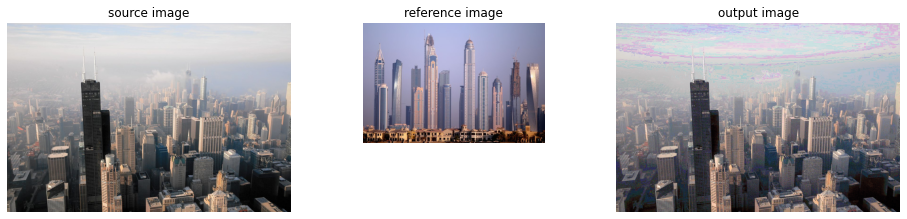

In [137]:
src = cv2.imread('src.jpg')
ref = cv2.imread('ref.jpg')
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, 3), 
                 axes_pad=1,  
                 )


grid[0].imshow(src[:,:,::-1])
grid[0].set_title('source image')
grid[0].axis('off')
grid[1].imshow(ref[:,:,::-1])
grid[1].set_title('reference image')
grid[1].axis('off')
grid[2].imshow(hist_matching(src,ref)[:,:,::-1])
grid[2].set_title('output image')
grid[2].axis('off')